In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
path_data1 = '/Users/SY/Desktop/obic/data/'#'D:/DATA/OBIC/'
path_data2 = 'C:/Users/1234/DATA/'
data_go = fits.open(path_data1 + 'gosss_all.fits')

In [2]:
start_time = time()
f = data_go[1].data

In [3]:
spt = list(f['STv3'])


In [4]:
# 分类(肉眼分类)
# 写成函数
def divid(s):
    # s is a string
    if 'N' in s or 'C' in s:
        new_s = s[2:]
    else:
        new_s = s[1:]
    if ':' in new_s:
        new_s = new_s[:-1]
    if '-' in new_s:
        new_s = new_s[:-2]
    f_s = float(new_s)
    print(f_s)
    return f_s
#    return round(f_s*2)/2 #round可能不可靠
#     return math.floor(f_s)

In [7]:
#math.floor(9.7)
for s in spt:
    f_s = divid(s)

9.7
9.0
9.0
7.0
9.5
9.7
9.5
9.0
7.0
7.0
8.0
5.0
8.0
7.5
8.0
7.5
7.5
4.0
9.5
8.0
9.2
5.0
7.0
6.5
7.0
5.5
9.0
6.0
8.0
7.5
8.0
9.5
9.5
8.0
9.7
7.5
9.0
3.5
7.0
5.0
9.0
9.7
4.5
6.0
9.5
6.5
5.5
5.0
9.7
8.5
6.0
7.0
9.0
9.7
4.5
4.0
5.5
6.0
5.0
6.5
6.0
4.5
6.5
6.0
6.0
8.5
7.0
8.0
8.0
7.0
7.0
7.5
9.2
7.5
9.7
8.5
8.5
8.0
4.0
5.0
4.0
8.0
8.0
9.5
7.0
7.5
5.5
6.5
7.5
6.0
6.5
9.7
9.5
7.0
7.0
7.0
6.5
7.0
6.5
9.2
9.7
7.5
7.0
7.0
8.0
9.5
7.0
7.5
5.5
6.5
5.5
8.0
3.5
8.5
7.0
6.5
6.5
9.2
9.7
9.0
9.7
7.0
5.0
7.5
9.5
6.0
7.0
9.2
9.5
9.0
9.5
8.0
6.0
8.5
7.5
9.5
8.5
9.7
8.0
8.0
6.0
9.0
5.5
9.2
7.5
9.7
5.5
7.5
8.0
3.0
6.0
9.5
9.5
8.0
8.0
9.7
7.5
7.0
7.0
6.5
8.5
3.0
8.0
6.0
6.0
4.5
8.5
4.5
7.0
6.5
6.0
9.7
5.5
7.5
9.7
9.7
5.5
6.0
8.0
7.0
8.0
6.5
8.0
6.5
9.2
9.0
9.7
9.0
8.0
7.0
8.5
9.0
8.5
9.0
9.5
8.0
8.0
8.5
9.5
7.5
9.7
9.7
9.2
6.5
7.5
9.5
8.5
9.2
9.5
8.0
6.0
9.2
7.5
9.7
8.5
9.7
8.5
9.7
6.5
8.0
5.5
5.0
8.5
4.5
8.5
8.0
9.0
6.0
8.5
9.0
9.5
4.5
4.0
4.5
9.5
6.5
3.5
9.0
6.5
8.5
9.0
7.0
8.0
9.7
9.7
9.7
9.0
9.5
6.0
9.0


In [49]:
#直接计算直方图的频数（算法有点粗暴）
new_spt = []
for s in spt:
    new_spt.append(divid(s))
    

figure_spt = np.array(new_spt) #散点
figure_spt_sort = np.sort(np.array([i for i in set(figure_spt)]))
count = []
for i in range(len(figure_spt_sort)):
    k = 0
    for ele in new_spt:
        if ele == figure_spt_sort[i]:
            k = k + 1
    count.append(k)
print(count)
print(figure_spt_sort)

[3, 1, 3, 12, 16, 14, 19, 19, 37, 49, 64, 51, 60, 39, 79, 123]
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5]


In [64]:
#give color(JH) or else in 2MASS
color_JH = f['Jmag']-f['Hmag']
color_JH[0]

-0.032999992

In [65]:
#fit scatter

ic = []
ratio = 10
for i in range(len(figure_spt_sort)):
    bin_c = []
    for ele_num in range(len(spt)):
        if figure_spt[ele_num] == figure_spt_sort[i]:
            bin_c.append(color_JH[ele_num])
    bin_c_ara = np.array(bin_c)
    #select the fit dot
    ratio_integer = math.ceil(len(bin_c)*ratio/100)
    a = np.median(np.sort(bin_c_ara)[:ratio_integer])
    ic.append(float(a))
use_ic = np.array(ic)
use_spt = np.array(figure_spt_sort)
print(use_ic)
print(use_spt)

[ 0.09000015  0.29000044  0.0010004   0.02699995 -0.0940001   0.00549984
 -0.03299999 -0.07349992 -0.0389998  -0.05800009 -0.08399963 -0.0715003
 -0.0485003  -0.08949995 -0.13550007 -0.11000013]
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5]


In [66]:
whole_figure = np.vstack((use_spt , use_ic)).T
print(whole_figure)

[[  2.00000000e+00   9.00001526e-02]
 [  2.50000000e+00   2.90000439e-01]
 [  3.00000000e+00   1.00040436e-03]
 [  3.50000000e+00   2.69999504e-02]
 [  4.00000000e+00  -9.40001011e-02]
 [  4.50000000e+00   5.49983978e-03]
 [  5.00000000e+00  -3.29999924e-02]
 [  5.50000000e+00  -7.34999180e-02]
 [  6.00000000e+00  -3.89997959e-02]
 [  6.50000000e+00  -5.80000877e-02]
 [  7.00000000e+00  -8.39996338e-02]
 [  7.50000000e+00  -7.15003014e-02]
 [  8.00000000e+00  -4.85002995e-02]
 [  8.50000000e+00  -8.94999504e-02]
 [  9.00000000e+00  -1.35500073e-01]
 [  9.50000000e+00  -1.10000134e-01]]


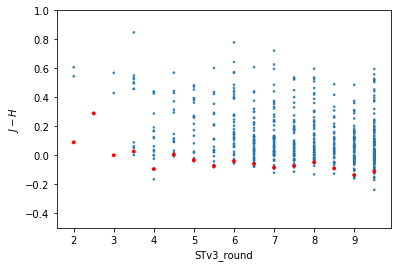

In [67]:
plt.scatter(figure_spt,color_JH , s=7, edgecolors='None', alpha=0.9)
plt.scatter(use_spt,use_ic, c='r', edgecolors='None', s=15)
plt.xlabel('STv3_round') ; plt.ylabel('$J-H$')
plt.ylim(-0.5,1.0)
plt.savefig('2017_10_29_GOSSS.png', dpi=200)
plt.show()